# Python Plots for LGalaxies

## Import Libraries and Read Catalogs

<p>Use functions read_snap or read_tree to read catalogs. These are both defined in procedures.py. In case of read_snap, SnapshotList will be returned containing the list of snapshots read (usefull to later select galaxies in a given redshift).<p>

In [90]:
import numpy as np
%matplotlib inline

import pandas as pd

%pylab inline
#import seaborn as sns
#sns.set_style('darkgrid')

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
from importlib import reload
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm
from decimal import *

import procedures
reload (procedures)
from procedures import *
import plots_input
reload (plots_input)
from plots_input import *

FirstFile = 0
LastFile =  1

Volume_MR = (BoxSize_MR**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles 
Volume_MRII = (BoxSize_MRII**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles 

if CatalogType=='snap':
    from LGalaxies_Henriques2015a_struct import LGalaxiesStruct
    from LGalaxies_Henriques2015a_struct import PropertiesToRead
    (G_MR, SnapshotList) = read_snap(DirName_MR,FirstFile,LastFile,
                     PropertiesToRead,LGalaxiesStruct,RedshiftsToRead,RedshiftList)
    
if CatalogType=='tree':    
    from LGalaxies_tree_Henriques2015a_struct import LGalaxiesStruct
    from LGalaxies_tree_Henriques2015a_struct import PropertiesToRead_tree    
    (G_MR) = read_tree(DirName_MR,FirstFile,LastFile,
                     PropertiesToRead_tree,LGalaxiesStruct,RedshiftsToRead,RedshiftList)    
     
    SnapshotList = np.zeros(len(RedshiftList),dtype=np.int32)
    for ii in range(0,len(RedshiftList)):                  
        G0=G_MR[ np.rint(G_MR['Redshift']*100.) == RedshiftList[ii]*100. ]             
        SnapshotList[ii]=G0['SnapNum'][0]
#endif      

print('reading done\n')
#print (np.log10(gal['StellarMass'][1:5]*1.e10))
#help(gal)


plt.rcParams.update({'font.size': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18, 'axes.linewidth': 2, 
                     'xtick.major.size': 6, 'xtick.major.width': 1.5, 
                     'ytick.major.size': 6, 'ytick.major.width': 1.5, 
                     'xtick.minor.size': 3, 'xtick.minor.width': 1.,                   
                     'ytick.minor.size': 3, 'ytick.minor.width': 1.})

Populating the interactive namespace from numpy and matplotlib


Reading Headers

TotNgals= [3764950]


File  0  nGals =  [2332354]
File  1  nGals =  [1432596]
reading done



`%matplotlib` prevents importing * from pylab and numpy


## Plots

In [91]:

with PdfPages('./fig/plots.pdf') as pdf:
    import plots
    reload (plots)
    
    if opt_stellar_mass_function==1:
        from plots import stellar_mass_function
        stellar_mass_function(G_MR, SnapshotList, Volume_MR, pdf)
        
    if opt_bluck_red_fractions==1:
        from plots import bluck_red_fractions
        bluck_red_fractions(G_MR, SnapshotList, pdf)
             
    if opt_test_plots==1:
        from plots import test_plots     
        test_plots(G_MR, SnapshotList, pdf)
        
#end with PdfPages('./fig/plots.pdf') as pdf: 

## Animations

finished
doing frame: 0
doing frame:

/Users/BrunoHenriques/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/Users/BrunoHenriques/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


 0
doing frame: 1


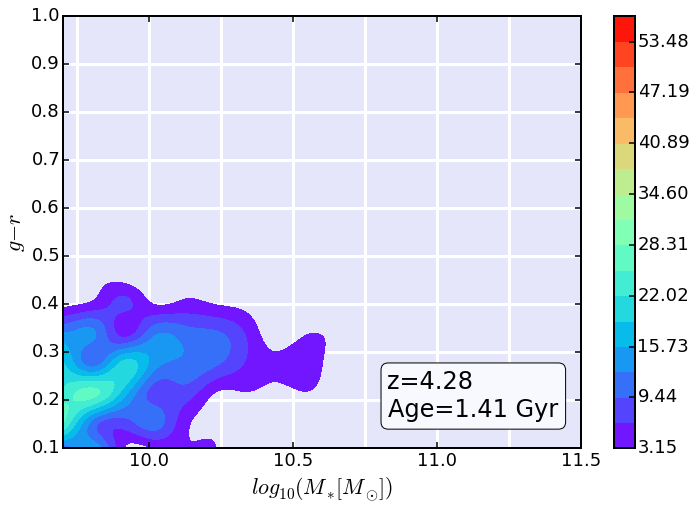

In [106]:
import animations
reload (animations)
    
if opt_anime_mass_gr==1:   
    from animations import anime_mass_gr
    anime_mass_gr(G_MR)